In [ ]:
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
%matplotlib inline

Data was produced using:

* SIMQSO templates
```
quickquasars -i $DESI_MOCKS/lya_forest/london/v2.0/17/1712/transmission-16-1712.fits --zmin 1.6 --nproc 10 --downsampling 1. --seed 42 --zbest --outdir ./SIMQSO --simqso --overwrite --exptime 1E6
```

* QSO templates
```
quickquasars -i $DESI_MOCKS/lya_forest/london/v2.0/17/1712/transmission-16-1712.fits --zmin 1.6 --nproc 10 --downsampling 1. --seed 42 --zbest --outdir ./QSO --overwrite --exptime 1E6
```

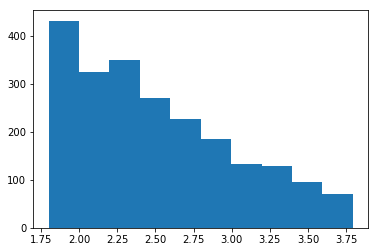

In [2]:
template = 'SIMQSO'
path='/global/cscratch1/sd/forero/test_quickquasars/{}/17/1712/'.format(template)
filename = 'zbest-16-1712.fits'
a = Table.read(path+filename)
_ = plt.hist(a['Z'])

In [3]:
np.where(a['Z']>3.5)

(array([  13,   27,   28,   32,   45,   47,   49,   50,   52,   53,   54,
          55,   56,   57,   58,   60,   61,   62,   63,   64,   65,   66,
          67,   70,   73,   90,   94,  110,  111,  117,  127,  128,  129,
         139,  146,  173,  182,  213,  225,  261,  309,  360,  361,  372,
         418,  516,  518,  519,  538,  581,  603,  626,  627,  699,  771,
         894,  899,  940,  989,  990, 1047, 1144, 1166, 1194, 1196, 1197,
        1200, 1224, 1257, 1258, 1259, 1260, 1261, 1263, 1282, 1283, 1284,
        1303, 1307, 1372, 1375, 1376, 1441, 1443, 1474, 1490, 1566, 1568,
        1588, 1616, 1641, 1689, 1746, 1757, 1818, 1819, 1822, 1838, 1842,
        1843, 1911, 1933, 1935, 1953, 1954, 1957, 1967, 1972, 1996, 2014,
        2016, 2017, 2049, 2070, 2080, 2085, 2086, 2087, 2093, 2109, 2188,
        2215, 2217]),)

In [4]:
np.where(a['Z']>2.0)

(array([   0,    1,    2, ..., 2215, 2216, 2217]),)

In [5]:
def get_qso_flux(filename, qso_id):
    hdus = fits.open(filename)
    b_lambda = hdus[2].data
    b_flux = hdus[3].data
    r_lambda = hdus[7].data
    r_flux = hdus[8].data
    z_lambda = hdus[12].data
    z_flux = hdus[13].data
    np.shape(b_flux), np.shape(b_lambda)
    all_lambda = np.append(b_lambda, r_lambda)
    all_lambda = np.append(all_lambda, z_lambda)
    all_flux = np.append(b_flux[qso_id,:], r_flux[qso_id,:])
    all_flux = np.append(all_flux, z_flux[qso_id,:])
    return b_lambda, b_flux[qso_id,:]

In [6]:
def plot_qso_results(qso_id):
    template = 'QSO'
    path='/global/cscratch1/sd/forero/test_quickquasars/{}/17/1712/'.format(template)
    filename = 'spectra-16-1712.fits'
    qso_lambda, qso_flux = get_qso_flux(path+filename, qso_id)
    template = 'SIMQSO'
    path='/global/cscratch1/sd/forero/test_quickquasars/{}/17/1712/'.format(template)
    filename = 'spectra-16-1712.fits'
    simqso_lambda, simqso_flux = get_qso_flux(path+filename, qso_id)

    plt.figure(figsize=(8,8))

    plt.subplot(211)
    plt.plot(qso_lambda, qso_flux, color='blue', alpha=0.5, label='QSO')
    plt.plot(simqso_lambda, simqso_flux, color='red', alpha=0.5, label='SIMQSO')
    plt.legend()
    plt.xlabel("Lambda [Angstrom]")
    plt.ylabel("Flux [1e-17 erg/(s cm2 Angstrom)]")

    plt.subplot(212)
    plt.plot(qso_lambda, qso_flux/simqso_flux, color='red', alpha=0.5)
    plt.xlabel("Lambda [Angstrom]")
    plt.ylabel("Flux QSO / Flux SIMQSO")

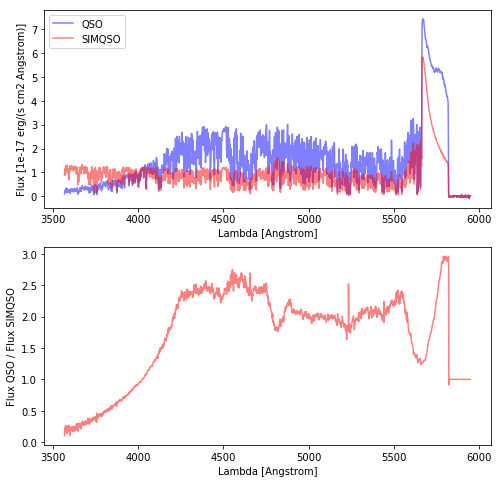

In [7]:
plot_qso_results(13)

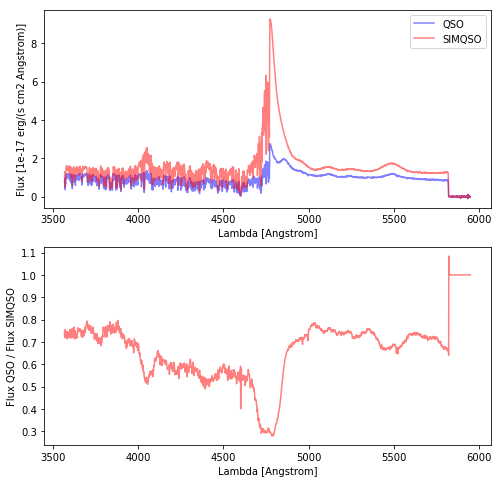

In [8]:
plot_qso_results(0)

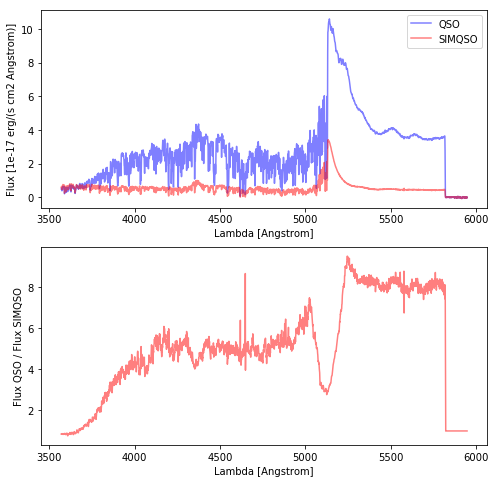

In [9]:
plot_qso_results(1)